In [1]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [2]:
#### import some basic librarie
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [4]:
### divide the dataset into dependent and independent fearures
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:,13]

In [9]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [11]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [13]:
###  feature Engineering (one-hot-encoding)
geography = pd.get_dummies(X['Geography'], drop_first = True)
gender =  pd.get_dummies(X['Gender'], drop_first = True)


In [15]:
gender

,Male
0,False
1,False
2,False
3,False
4,False
...,...
9995,True
9996,True
9997,False
9998,True


In [17]:
## concatenate these variables with the dataframe
X = X.drop(['Geography', 'Gender'], axis = 1)

In [19]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [21]:
X = pd.concat([X, geography, gender], axis = 1)

In [23]:
## splitting the data into training set and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 0)

In [25]:
### featur scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [27]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [29]:
X_train.shape

(8000, 11)

In [31]:
### part 2 creating the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU,LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout

In [33]:
###  lets initialize the ANN
classifier = Sequential()


In [35]:
### adding the input layer
classifier.add(Dense(units=11, activation='relu'))


In [37]:
### adding the first hidden layer
classifier.add(Dense(units=7,activation='relu'))

In [39]:
### adding second hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [41]:
### adding the output layer 
classifier.add(Dense(1, activation='sigmoid'))

In [43]:
classifier.compile(optimizer='adam',loss= 'binary_crossentropy', metrics=['accuracy'])

In [45]:
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [47]:
model_history = classifier.fit(X_train, y_train,validation_split=0.33, batch_size=10, epochs =1000, callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7497 - loss: 0.5362 - val_accuracy: 0.7989 - val_loss: 0.4492
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7976 - loss: 0.4436 - val_accuracy: 0.8160 - val_loss: 0.4261
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8280 - loss: 0.4099 - val_accuracy: 0.8243 - val_loss: 0.4061
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8443 - loss: 0.3807 - val_accuracy: 0.8338 - val_loss: 0.3882
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8521 - loss: 0.3668 - val_accuracy: 0.8410 - val_loss: 0.3769
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8584 - loss: 0.3553 - val_accuracy: 0.8440 - val_loss: 0.3715
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8589 - loss: 0.3473 - val_accuracy: 0.8417 - val_loss: 0.3739
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8633 - loss: 0.3348 - 

In [50]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

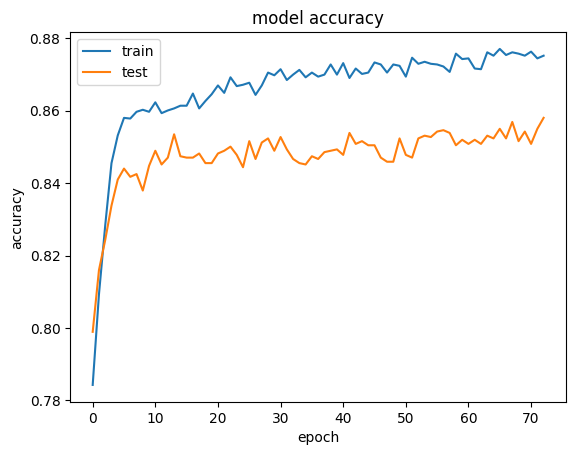

In [56]:
###summary of history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc ='upper left')
plt.show()

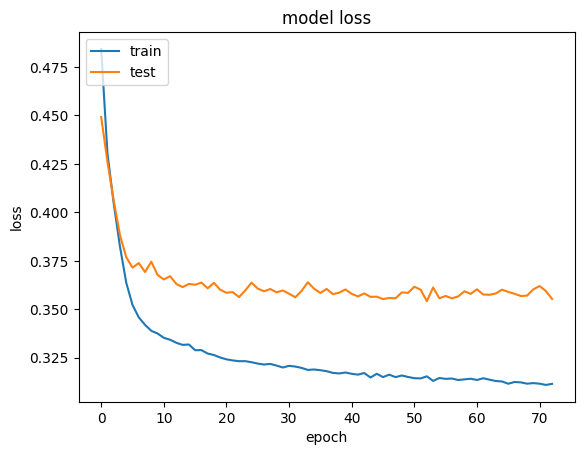

In [58]:
### summary for the loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc ='upper left')
plt.show()

In [60]:
###  making predictions and evaluating the model 

## predicting the test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [62]:
## make the confusion matrix 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1500,   95],
       [ 188,  217]], dtype=int64)

In [64]:
### calculate accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
score

0.8585

In [66]:
### get the weights 
classifier.get_weights()

[array([[ 9.43071470e-02,  1.56700477e-01,  2.14637011e-01,
         -1.08552240e-01,  1.06979989e-01, -1.74419552e-01,
         -3.49124998e-01,  1.90148994e-01, -8.19943496e-04,
         -1.23397253e-01, -1.39109537e-01],
        [ 2.25412309e-01,  1.73579738e-01, -7.98507869e-01,
          6.62628651e-01,  5.06674647e-01,  4.37244447e-03,
         -1.68182343e-01, -3.42083611e-02,  6.72677517e-01,
         -7.08424747e-01,  1.91296339e-01],
        [-3.75454426e-01,  1.21199444e-01,  9.13834050e-02,
          1.78854108e-01, -4.48713750e-02,  1.59373134e-01,
         -3.78597200e-01,  2.30545700e-01,  2.59964466e-01,
          2.14255080e-01,  1.54946931e-02],
        [ 8.44760537e-02, -5.06926000e-01, -2.14172944e-01,
         -2.16430426e-01, -2.52521217e-01, -7.81479239e-01,
          5.67884684e-01,  1.14300847e+00,  3.59791279e-01,
         -4.33140278e-01,  2.14148834e-01],
        [-5.81493080e-01, -5.21003082e-02, -1.50337055e-01,
         -4.90387768e-01, -7.08098710e-01, -